<a href="https://colab.research.google.com/github/stinh/Tiba_03_Image-recognition/blob/main/03_Image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

抓取指定影片的前景輪廓。

In [ ]:
import cv2,time,codecs,base64
import numpy as np
import IPython.display as dp
from PIL import ImageFont, ImageDraw, Image
from google.colab.patches import cv2_imshow

影片轉檔colab讀取格式

In [ ]:
!ffmpeg -i h3.mp4 -vcodec libx264 2.mp4 #將來源檔案轉檔為結果檔案(x264格式)
with codecs.open("2.mp4","rb") as f: #以二進式讀2.mp4檔案
  r = base64.b64encode(f.read()).decode() #將影片轉為base64格式

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

影片預覽

In [ ]:
dp.HTML(f'<video src="data:video/mp4;base64,{r}" controls />') #將影片寫入html格式，確認能否在網頁播放


In [ ]:
p1=cv2.VideoCapture("2.mp4") #影像讀取：取得影像來源

print("寬：",p1.get(3))
print("高：",p1.get(4))
print("每秒的影格數FPS：",p1.get(5)) #製圖設定的影格，每秒的格數
print("影片的總影格數：",p1.get(7)) #迴圈總共畫了幾次


寬： 640.0
高： 360.0
每秒的影格數FPS： 30.0
影片的總影格數： 509.0


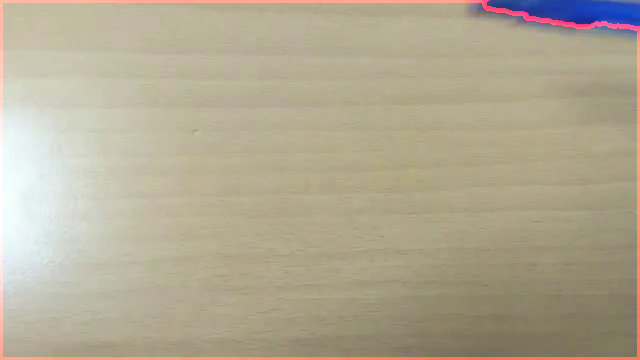

In [ ]:
p2=cv2.VideoWriter("3.mp4", cv2.VideoWriter_fourcc(*'MP4V'), 24, (500,500)) 

#影片讀取

while p1.isOpened()==True: 
  ret, m1 = p1.read()
  if ret==True:    
    dp.clear_output(True)
    
    #筆位置會移動，所以不能用繪圖，要用取得輪廓，但只能辨識灰階，所以要先轉灰階

    th, m2=cv2.threshold(m1, 60, 205, cv2.THRESH_BINARY_INV)
    # th, m3=cv2.threshold(m1, 60, 205, cv2.THRESH_BINARY_INV)
    # cv2_imshow(m2) 
    # m3 = cv2.inRange(m2,(0,0,0), (150,30,30)) XXX 太多雜訊
    m3 = cv2.inRange(m2,(0,0,0), (205,0,0))
    # cv2_imshow(m3) 

    # # #抓不到筆，侵蝕看看
    # cv2.erode(m3,(1,1))
    # cv2.morphologyEx(m3,cv2.MORPH_OPEN,(2,2))
    # cv2_imshow(m3) 

    #抓輪廓(只能灰階圖)
    a, b = cv2.findContours(m3,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    # print(len(a))

    maxIndex=0 
    for i in range(1,len(a),1):
      x1, y1, w1, h1 =cv2.boundingRect(a[i])
      x2, y2, w2, h2 =cv2.boundingRect(a[maxIndex])
      if w1*h1 > w2*h2:
        maxIndex = i  

        m4=np.full(m1.shape,(0,0,0),np.uint8) #先做一張底圖
        cv2.drawContours(m4,a,maxIndex,(0,0,255),4) #在底圖上繪製輪廓

        # cv2_imshow(m4)

        m5=cv2.add(m1,m4) #兩張圖相加
        cv2_imshow(m5)
        time.sleep(0.1) #等待時間

  else:
    break

p2.release() 